In [1]:
# 获取Google网盘的访问权限

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
# 获取训练集并对训练集的图像进行reshape

train_txt_path = './gdrive/My Drive/remote/RSDataset/train.txt'
img = []
train_imgs = [];
train_label = []
fh = open(train_txt_path, 'r')
for line in fh:
    line = line.rstrip()
    words = line.split()
    img = Image.open(words[0]+' '+words[1]).convert('RGB');
    img = img.resize((40,40))
    img = np.array(img)
    train_imgs.append(img)
    train_label.append(int(words[2]))
train_imgs = np.array(train_imgs)
train_label = np.array(train_label)
train_imgs = np.reshape(train_imgs, (train_imgs.shape[0], -1))

In [0]:
# 获取测试集并对测试集的图像进行reshape

test_txt_path = './gdrive/My Drive/remote/RSDataset/test.txt'
img = []
test_imgs = [];
test_label = []
fh = open(test_txt_path, 'r')
for line in fh:
    line = line.rstrip()
    words = line.split()
    img = Image.open(words[0]+' '+words[1]).convert('RGB');
    img = img.resize((40,40))
    img = np.array(img)
    test_imgs.append(img)
    test_label.append(int(words[2]))
test_imgs = np.array(test_imgs)
test_label = np.array(test_label)
test_imgs = np.reshape(test_imgs, (test_imgs.shape[0], -1))

In [0]:
# 构建KNearestNeighbor类

class KNearestNeighbor(object):
  """ a kNN classifier with L2 distance """

  def __init__(self):
    pass

  def train(self, X, y):

    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1):

    dists = self.compute_distances_one_loop(X)


    return self.predict_labels(dists, k=k)


  def compute_distances_one_loop(self, X):


    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      pass
      dists[i, :] = np.linalg.norm(self.X_train - X[i,:], axis = 1)

    return dists

  def predict_labels(self, dists, k=1):

    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):

      closest_y = []

      pass
      closest_y = self.y_train[np.argsort(dists[i])[0:k]]

      pass
      y_pred[i] = np.bincount(closest_y).argmax()

    return y_pred

In [0]:
# 实例化分类器并加载训练集

classifier = KNearestNeighbor()
classifier.train(train_imgs, train_label)

In [8]:
# 测试k=1时的效果
num_test = test_label.shape[0]

test_pred = classifier.predict(test_imgs, k=1)
num_correct = np.sum(test_pred == test_label)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 33 / 206 correct => accuracy: 0.160194


In [9]:
# 尝试不同的k值对分类效果的影响

num_test = test_label.shape[0]
accuracy = []

k = [1,3,5,10,15]
for i,element in enumerate(k):
  test_pred = classifier.predict(test_imgs, k=element)
  num_correct = np.sum(test_pred == test_label)
  accuracy.append(float(num_correct) / num_test)
  print('k = %d : Got %d / %d correct => accuracy: %f' % (k[i], num_correct, num_test, accuracy[i]))

k = 1 : Got 33 / 206 correct => accuracy: 0.160194
k = 3 : Got 29 / 206 correct => accuracy: 0.140777
k = 5 : Got 24 / 206 correct => accuracy: 0.116505
k = 10 : Got 21 / 206 correct => accuracy: 0.101942
k = 15 : Got 21 / 206 correct => accuracy: 0.101942


Text(0.5, 1.0, 'kNN')

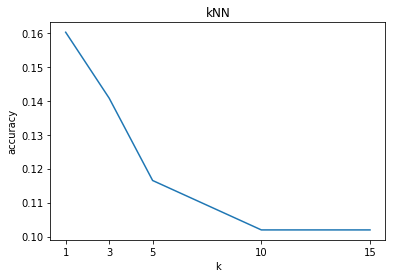

In [10]:
# 绘制曲线图

my_x_ticks = [1,3,5,10,15]
plt.xticks(my_x_ticks)
plt.plot(k,accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('kNN')